# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Dogecoin (DOGE) Up 12% After Elon Musk’s Tweet of Working With DOGE Developers.  It seems Elon Musk has been moving the crypto market at his whims as of now. A day after Tesla announced that it is dropping Bitcoin (BTC) payments citing environmental concerns, Musk is now driving the attention of his followers to Dogecoin (DOGE). On late Thursday, May 13, Elon Musk tweeted that he (and probably The post Dogecoin (DOGE) Up 12% After Elon Musk&#8217;s Tweet of Working With DOGE Developers appeared first on Coingape. ... [| Skaityti daugiau](https://coingape.com/dogecoin-doge-12-elon-musks-tweet-working-doge-developers/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Covid: US relaxes mask guidance for fully vaccinated Americans.  US health officials say masks and physical distancing are no longer needed for vaccinated Americans. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-us-canada-57109039) 

### Kainų kaita pandemijos metu

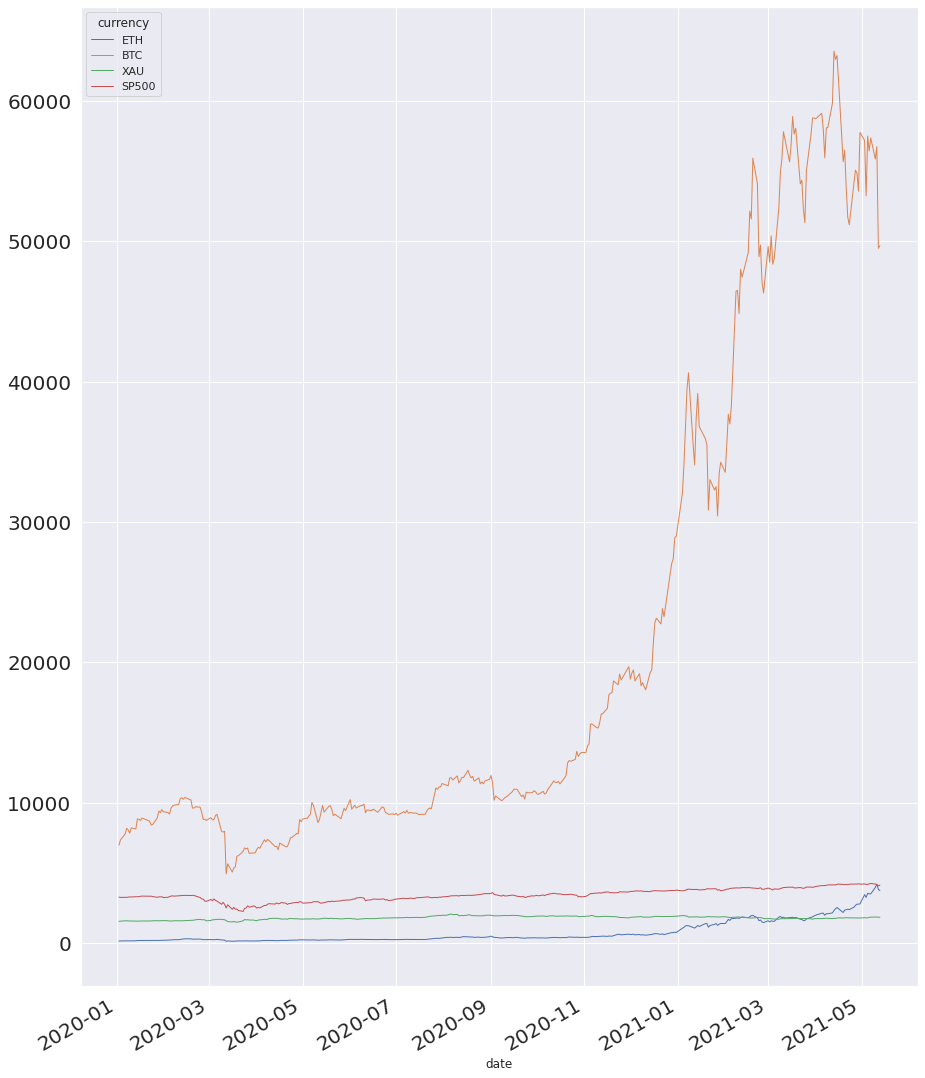

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.932381,0.128851,0.812565
BTC,0.932381,1.000000,0.097799,0.846288
XAU,0.128851,0.097799,1.000000,0.372721
SP500,0.812565,0.846288,0.372721,1.000000


In [8]:
#hide ### Koreliacijos matrica.

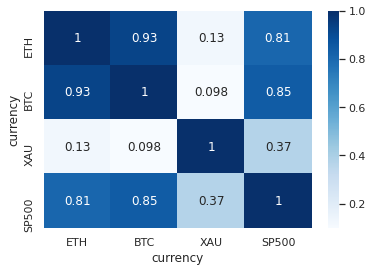

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')